# **Langgraph BMI Calculator**

In [ ]:
!pip install langgraph

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [43]:
class BMIState(TypedDict):

  weight_kg : float
  height_m : float
  bmi: float
  category: str

In [44]:
#define the function that calculate the bmi
def calculate_bmi(state: BMIState) -> BMIState:

  weight = state['weight_kg']
  height = state['height_m']

  bmi = weight / (height**2)

  state['bmi'] = round(bmi, 2)

  return state

In [45]:
def label_bmi(state: BMIState) -> BMIState:
  bmi = state['bmi']

  if bmi < 18.5:
      state["category"] = "Underweight"
  elif 18.5 <= bmi < 25:
      state["category"] = "Normal"
  elif 25 <= bmi < 30:
      state["category"] = "Overweight"
  else:
      state["category"] = "Obese"

  return state


In [46]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

#add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

#compile the graph
workflow = graph.compile()

In [47]:
from typing_extensions import final
#execute the graph

initial_state = {
    "weight_kg": 80,
    "height_m": 1.73
}


final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


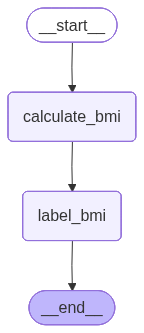

In [48]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

# **Sum Calculator**

In [35]:
import langgraph

In [36]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [33]:
class SUMSTATE(TypedDict):
  number1 : float
  number2 : float
  result : float

graph = StateGraph(SUMSTATE)

In [34]:
def calculate_sum(state: SUMSTATE) -> SUMSTATE:
  number1 = state['number1']
  number2 = state['number2']

  result = number1 + number2

  state['result'] = result

In [39]:
graph = StateGraph(SUMSTATE)

#add the node in the graph
graph.add_node('calculate_sum', calculate_sum)

#add the edges in the graph
graph.add_edge(START, 'calculate_sum')
graph.add_edge('calculate_sum', END)

#compile the graph

workflow = graph.compile()

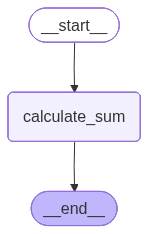

In [40]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())